In [2]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

In [31]:
w = 0.3
b = 0.9

start = 0
end = 100
step = 0.5

X = torch.arange(start,end,step).unsqueeze(dim=1)
y = w * X + b

X[:10], y[:10]

(tensor([[0.0000],
         [0.5000],
         [1.0000],
         [1.5000],
         [2.0000],
         [2.5000],
         [3.0000],
         [3.5000],
         [4.0000],
         [4.5000]]),
 tensor([[0.9000],
         [1.0500],
         [1.2000],
         [1.3500],
         [1.5000],
         [1.6500],
         [1.8000],
         [1.9500],
         [2.1000],
         [2.2500]]))

In [32]:
train_split = int(0.8 * len(X))

X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(X_test), len(y_train), len(y_test)

(160, 40, 160, 40)

In [33]:
def plot_predictions(
        train_data = X_train,
        train_labels = y_train,
        test_data = X_test,
        test_labels = y_test,
        predictions = None):
    
    plt.figure(figsize=(10,8))
    plt.scatter(train_data, train_labels, c="b", s=4, label="Training Data")
    plt.scatter(test_data, test_labels, c="g", s=4, label="Training Data")

    if predictions is not None:
        plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")
    
    plt.legend(prop={"size": 14})

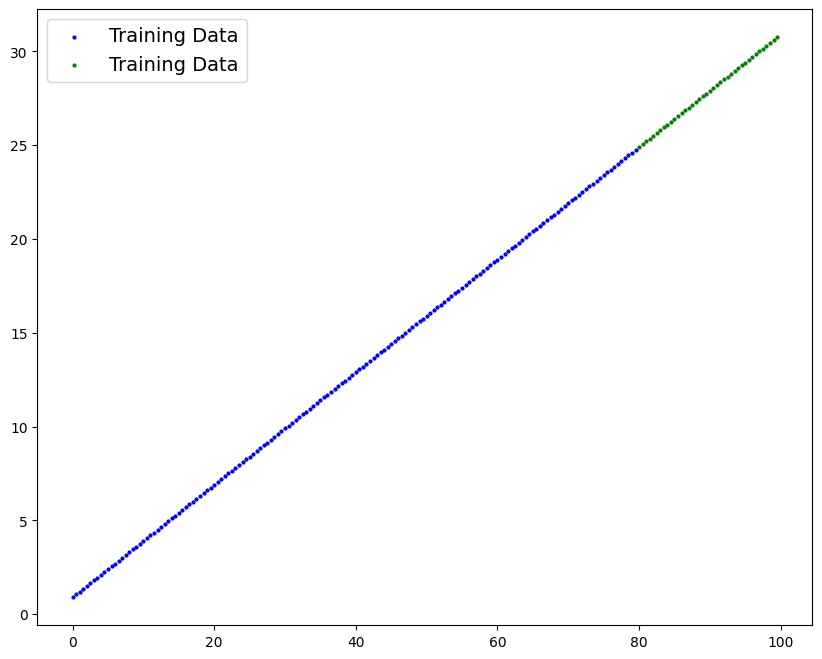

In [34]:
plot_predictions()

In [36]:
class LinearRegressionModelV3(nn.Module):
    def __init__(self):
        super().__init__()

        self.weight = nn.Parameter(torch.randn(1, dtype=torch.float32), requires_grad=True)
        self.bias = nn.Parameter(torch.randn(1, dtype=torch.float32), requires_grad=True)

    def forward(self, X: torch.Tensor) -> torch.Tensor:
        return self.weight * X + self.bias
    


In [37]:
torch.manual_seed(57)

model_0 = LinearRegressionModelV3()

model_0.state_dict()

OrderedDict([('weight', tensor([0.1446])), ('bias', tensor([-0.1165]))])

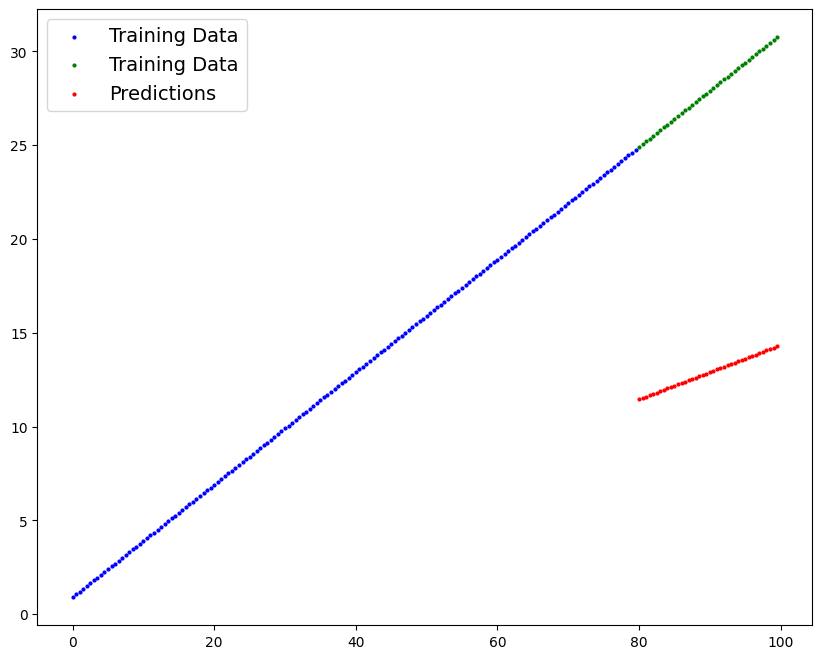

In [38]:
with torch.inference_mode():
    preds_before_training = model_0(X_test)

plot_predictions(predictions=preds_before_training)

In [73]:
loss_function = nn.L1Loss()

optimizer = torch.optim.SGD(params=model_0.parameters(), lr=0.001)

In [74]:
epochs = 300

train_loss_values = []
test_loss_values = []
epoch_counts = []

for epoch in range(epochs):

    model_0.train()
    
    y_pred = model_0(X_train)

    loss = loss_function(y_pred, y_train)

    optimizer.zero_grad()

    loss.backward()

    optimizer.step()



    model_0.eval()

    with torch.inference_mode():
        test_preds = model_0(X_test)
        test_loss = loss_function(y_test, test_preds)

    if epoch % 20 == 0:
        epoch_counts.append(epoch)
        train_loss_values.append(loss.detach().numpy())
        test_loss_values.append(test_loss.detach().numpy())
        print(f"Epoch: {epoch} | MAE Train Loss: {loss} | MAE Test Loss: {test_loss} ") 



Epoch: 0 | MAE Train Loss: 0.013590233400464058 | MAE Test Loss: 3.5378785133361816 
Epoch: 20 | MAE Train Loss: 0.013590233400464058 | MAE Test Loss: 3.5378785133361816 
Epoch: 40 | MAE Train Loss: 0.013590233400464058 | MAE Test Loss: 3.5378785133361816 
Epoch: 60 | MAE Train Loss: 0.013590233400464058 | MAE Test Loss: 3.5378785133361816 
Epoch: 80 | MAE Train Loss: 0.013590233400464058 | MAE Test Loss: 3.5378785133361816 
Epoch: 100 | MAE Train Loss: 0.013590233400464058 | MAE Test Loss: 3.5378785133361816 
Epoch: 120 | MAE Train Loss: 0.013590233400464058 | MAE Test Loss: 3.5378785133361816 
Epoch: 140 | MAE Train Loss: 0.013590233400464058 | MAE Test Loss: 3.5378785133361816 
Epoch: 160 | MAE Train Loss: 0.013590233400464058 | MAE Test Loss: 3.5378785133361816 
Epoch: 180 | MAE Train Loss: 0.013590233400464058 | MAE Test Loss: 3.5378785133361816 
Epoch: 200 | MAE Train Loss: 0.013590233400464058 | MAE Test Loss: 3.5378785133361816 
Epoch: 220 | MAE Train Loss: 0.013590233400464058

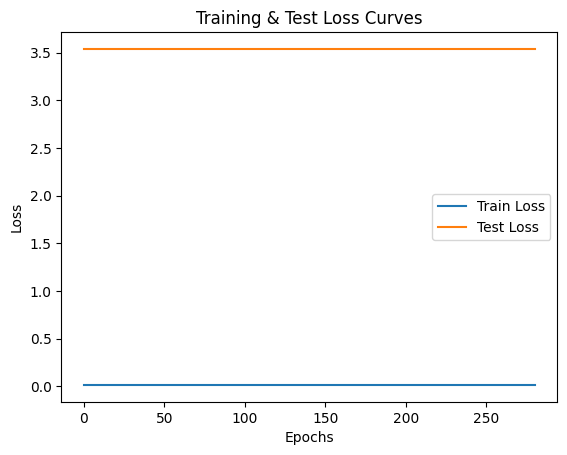

In [75]:
plt.plot(epoch_counts, train_loss_values, label = "Train Loss")
plt.plot(epoch_counts, test_loss_values, label = "Test Loss")
plt.title("Training & Test Loss Curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend()

In [72]:
print("The model learned the following values for weights and bias:")
print(model_0.state_dict())
print("\nAnd the original values for weights and bias are:")
print(f"weights: {w}, bias: {b}")

The model learned the following values for weights and bias:
OrderedDict([('weight', tensor([0.3003])), ('bias', tensor([0.9000]))])

And the original values for weights and bias are:
weights: 0.3, bias: 0.9


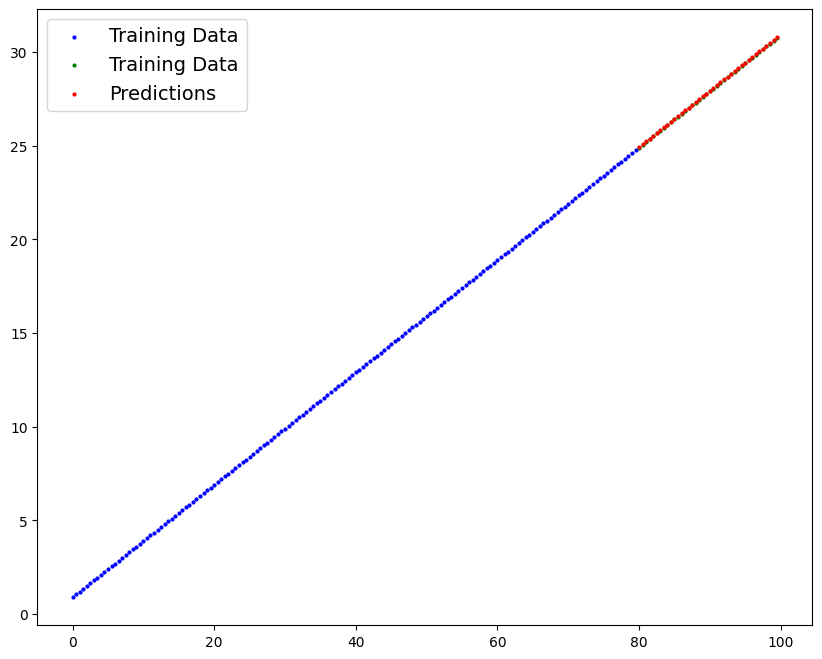

In [77]:
model_0.eval()
with torch.inference_mode():
    y_preds = model_0(X_test)
    
plot_predictions(predictions=y_preds)

In [78]:
from pathlib import Path

MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

MODEL_NAME = "01_pytorch_workflow_homework_0.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

print(f"Saving model to : {MODEL_SAVE_PATH}")
torch.save(obj=model_0.state_dict(), f=MODEL_SAVE_PATH)

Saving model to : models\01_pytorch_workflow_homework_0.pth


In [79]:
loaded_model_0 = LinearRegressionModelV3()

loaded_model_0.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

<All keys matched successfully>

In [80]:
loaded_model_0.eval()

with torch.inference_mode():
    loaded_model_preds = loaded_model_0(X_test)

print(f"Prediction Number: {len(y_preds)} --- Same Prediction Number : {(y_preds == loaded_model_preds).sum().item()}")

Prediction Number: 40 --- Same Prediction Number : 40
